In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df =  pd.read_csv('nba.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [14]:
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [15]:

df = df.dropna(subset = ['Name','Team','Number','Position','Age','Height','Weight'])
df.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [16]:
clg_mode = df['College'].mode()[0]
df['College'] = df['College'].fillna(clg_mode)

In [17]:
sal_mean = df['Salary'].mean()
df['Salary'] = df['Salary'].fillna(sal_mean)
sal_mean

4842684.105381166

In [18]:
df.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [19]:
df['Team'].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [20]:
team_grp = df.groupby('Team')

In [22]:
i = 0
for name, grp in team_grp:
    if i > 3:
        break
    print("Name", name)
    print(grp.describe(), "\n\n")
    i += 1

Name Atlanta Hawks
          Number        Age      Weight        Salary
count  15.000000  15.000000   15.000000  1.500000e+01
mean   19.000000  28.200000  221.266667  4.860197e+06
std    11.476684   4.229151   25.982045  5.194508e+06
min     0.000000  22.000000  172.000000  5.250930e+05
25%    11.500000  24.000000  203.000000  1.152260e+06
50%    17.000000  27.000000  225.000000  2.854940e+06
75%    25.500000  31.000000  242.500000  6.873240e+06
max    43.000000  35.000000  260.000000  1.867166e+07 


Name Boston Celtics
          Number        Age      Weight        Salary
count  15.000000  15.000000   15.000000  1.500000e+01
mean   31.866667  24.733333  219.466667  4.225583e+06
std    30.300558   2.840188   25.606547  3.036396e+06
min     0.000000  20.000000  180.000000  1.148640e+06
25%     9.500000  22.000000  197.500000  1.994760e+06
50%    28.000000  25.000000  220.000000  3.425510e+06
75%    42.500000  27.000000  236.500000  5.898058e+06
max    99.000000  29.000000  260.000000 

In [24]:
grp_salary = list(team_grp['Salary'])
grp_salary

[('Atlanta Hawks',
  309     2000000.0
  310     1304520.0
  311     2854940.0
  312    12000000.0
  313     1000000.0
  314     5746479.0
  315    18671659.0
  316      947276.0
  317      525093.0
  318     1763400.0
  319     3333333.0
  320     4000000.0
  321     9756250.0
  322     1000000.0
  323     8000000.0
  Name: Salary, dtype: float64),
 ('Boston Celtics',
  0     7.730337e+06
  1     6.796117e+06
  2     4.842684e+06
  3     1.148640e+06
  4     5.000000e+06
  5     1.200000e+07
  6     1.170960e+06
  7     2.165160e+06
  8     1.824360e+06
  9     3.431040e+06
  10    2.569260e+06
  11    6.912869e+06
  12    3.425510e+06
  13    1.749840e+06
  14    2.616975e+06
  Name: Salary, dtype: float64),
 ('Brooklyn Nets',
  15     3425510.0
  16      845059.0
  17     1500000.0
  18     1335480.0
  19     6300000.0
  20     1599840.0
  21      134215.0
  22     1500000.0
  23    19689000.0
  24     1140240.0
  25      947276.0
  26      981348.0
  27      947276.0
  28      9472

In [25]:
bins = [x*10 for x in range(1,6)]
bins

[10, 20, 30, 40, 50]

Text(0.5, 0, 'Age')

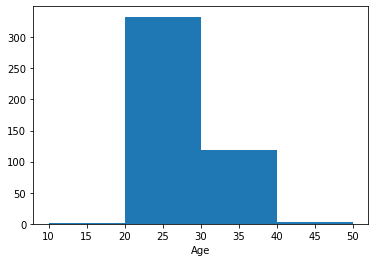

In [32]:
plt.hist(df['Age'],bins=bins)
plt.xlabel("Age")